In [6]:
import pandas as pd

df = pd.read_csv('fin_openai.csv')
df.head()
df2 = pd.read_csv('fin_anthropic.csv')
df2.head()

,prompt_token_count,completion_token_count,model_latency,model
0,1919,422,11.925643,claude-3-5-sonnet
1,1919,422,7.184107,claude-3-5-sonnet
2,2553,437,6.552744,claude-3-5-sonnet
3,1909,370,11.349604,claude-3-5-sonnet
4,2477,93,2.095098,claude-3-5-sonnet


In [2]:
num_rows = df.shape[0]
num_rows

403

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df[['prompt_tokens', 'completion_tokens']].values
# Transform the data to match the given function: a0 * prompt_tokens + ((a1 * prompt_tokens) + a2) * completion_tokens + a3
X_transformed = np.column_stack((X[:, 0], X[:, 0] * X[:, 1], X[:, 1]))
y = df['latency'].values

# Perform the regression
model = LinearRegression()
model.fit(X_transformed, y)

# Extract coefficients
a0, a1, a2 = model.coef_
intercept = model.intercept_
(a0, a1, a2, intercept)

(6.31792276231343e-05,
 -2.0024945752405732e-07,
 0.012431089534853399,
 0.34033922656541726)

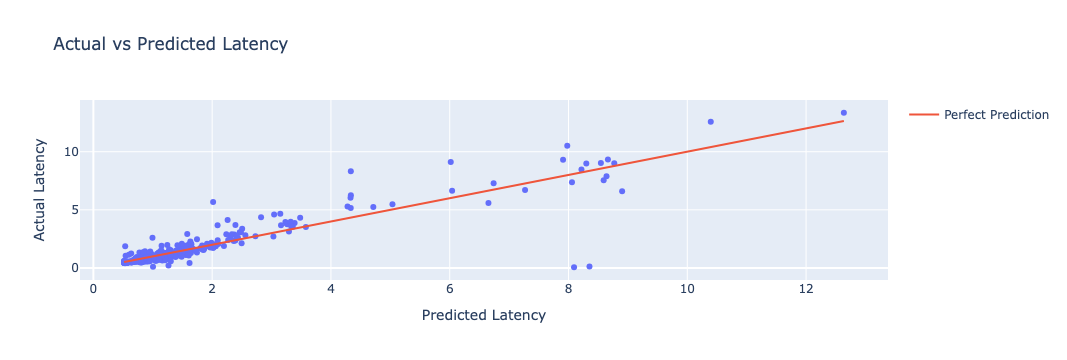

In [12]:
import plotly.express as px
import plotly.graph_objects as go

# Predict latency using the regression model
predicted_latency = model.predict(X_transformed)

# Create a scatter plot of the actual vs predicted latency
fig = px.scatter(x=predicted_latency, y=y, labels={'x': 'Predicted Latency', 'y': 'Actual Latency'}, title='Actual vs Predicted Latency')

# Add a line for perfect prediction
fig.add_trace(go.Scatter(x=[min(predicted_latency), max(predicted_latency)], y=[min(predicted_latency), max(predicted_latency)], mode='lines', name='Perfect Prediction'))

fig.show()

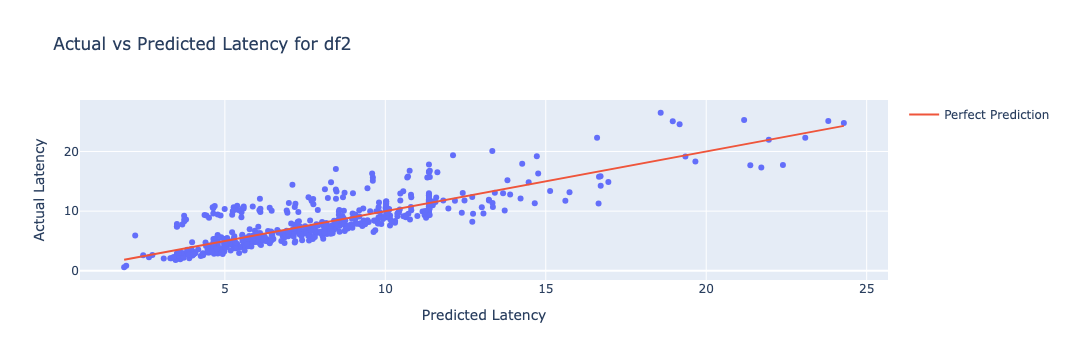

In [13]:
import plotly.express as px
import plotly.graph_objects as go

# Predict latency using the regression model for df2
predicted_latency2 = model2.predict(X2_transformed)

# Create a scatter plot of the actual vs predicted latency for df2
fig2 = px.scatter(x=predicted_latency2, y=y2, labels={'x': 'Predicted Latency', 'y': 'Actual Latency'}, title='Actual vs Predicted Latency for df2')

# Add a line for perfect prediction
fig2.add_trace(go.Scatter(x=[min(predicted_latency2), max(predicted_latency2)], y=[min(predicted_latency2), max(predicted_latency2)], mode='lines', name='Perfect Prediction'))

fig2.show()

In [11]:
# Prepare the data for df2
X2 = df2[['prompt_token_count', 'completion_token_count']].values
# Transform the data to match the given function: a0 * prompt_tokens + ((a1 * prompt_tokens) + a2) * completion_tokens + a3
X2_transformed = np.column_stack((X2[:, 0], X2[:, 0] * X2[:, 1], X2[:, 1]))
y2 = df2['model_latency'].values

# Perform the regression
model2 = LinearRegression()
model2.fit(X2_transformed, y2)

# Extract coefficients
a0_2, a1_2, a2_2 = model2.coef_
intercept2 = model2.intercept_
(a0_2, a1_2, a2_2, intercept2)

(0.00012577275422516668,
 -1.4544080790827811e-08,
 0.013518836891387474,
 1.7626806026587483)

In [14]:
# Calculate the ratio a2/a0 for both analyses
a2_a0_ratio_df = a2 / a0
a2_a0_ratio_df2 = a2_2 / a0_2
(a2_a0_ratio_df, a2_a0_ratio_df2)

(196.7591248345922, 107.48621173696459)